In [1]:
!pip install pyclustertend

In [2]:
!pip install pickle5

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pickle5 as pickle

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data & preprocessing

In [5]:
# path=r'/content/drive/MyDrive'
path=r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\00Final Project'
df=pickle.load(open(f"{path}/ml_project_dataset.pkl", "rb"))

In [6]:
Data=df.values

In [7]:
#Arranging gender label
print(np.unique(Data[ :,1]))
Gender = Data[ : , 1]
indices_f = [i for i, x in enumerate(Gender) if x == 'F' or x =='female' ]
indices_m = [i for i, x in enumerate(Gender) if x == 'M' or x =='male' or x == 'm' ]

for i in (indices_f): Gender[i] = 'Female'
for i in (indices_m): Gender[i] = 'Male'
Data[ : , 1] = Gender
print(np.unique(Data[ : , 1]))  # Done

['F' 'Female' 'M' 'Male' 'female' 'm' 'male']
['Female' 'Male']


In [8]:
#Arranging Status label
print(np.unique(Data[ :,2]))
status = Data[ : ,2]
indices_S = [i for i, x in enumerate(status) if x == 'sad' or x =='S' ]
indices_H = [i for i, x in enumerate(status) if x == 'H' or x =='happy' or x == 'happy ' ]
indices_N = [i for i, x in enumerate(status) if x == 'N' or x =='Normal' or x =='natural'  or x=='neutral']

for i in (indices_S): status[i] = 'Sad'
for i in (indices_H): status[i] = 'Happy'
for i in (indices_N): status[i] = 'Neutral'

indices_fake =[i for i, x in enumerate(status) if x != 'Sad' and x !='Happy' and x!= 'Neutral' ]
print(indices_fake)
Data[ : , 2] = status

['0040a40fde' '0041a40fde' '0042a40fde' '0043a40fde' '0044a40fde'
 '0045a40fde' '0046a40fde' '0047a40fde' '0048a40fde' '0049a40fde'
 '0050a40fde' '0051a40fde' '0052a40fde' '0053a40fde' '0054a40fde'
 '0d02ffb6f1' '0d02ffb6f10' '0d02ffb6f11' '0d02ffb6f12' '0d02ffb6f13'
 '0d02ffb6f14' '0d02ffb6f15' '0d02ffb6f2' '0d02ffb6f3' '0d02ffb6f4'
 '0d02ffb6f5' '0d02ffb6f6' '0d02ffb6f7' '0d02ffb6f8' '0d02ffb6f9'
 '597e0ee7bf' '598e0ee7bf' '599e0ee7bf' '600e0ee7bf' '601e0ee7bf'
 '602e0ee7bf' '603e0ee7bf' '604e0ee7bf' '605e0ee7bf' '606e0ee7bf'
 '607e0ee7bf' '608e0ee7bf' '609e0ee7bf' '610e0ee7bf' '611e0ee7bf'
 '77ae9e7a38' '77ae9e7a39' '77ae9e7a40' '77ae9e7a41' '77ae9e7a42'
 '77ae9e7a43' '77ae9e7a44' '77ae9e7a45' '77ae9e7a46' '77ae9e7a47'
 '77ae9e7a48' '77ae9e7a49' '77ae9e7a50' '77ae9e7a51' '77ae9e7a52' 'H'
 'Happy' 'N' 'Neutral' 'Normal' 'S' 'Sad' 'happy' 'happy ' 'natural'
 'neutral' 'sad']
[18, 75, 126, 137, 148, 154, 185, 186, 209, 244, 254, 297, 327, 351, 355, 378, 380, 427, 452, 495, 562, 593, 62

In [9]:
#Removing fake datas
Data = [Data[x , : ] for x in range(len(Data[: , 0])) if x not in (indices_fake)]
Data = np.array(Data)

In [10]:
print(np.unique(Data[ : , 0]))
print(np.unique(Data[ : , 1]))
print(np.unique(Data[ : , 2]))
#All checked

[5 6 7 8 9 10 11 12 14 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 38 40 44 46 47 49 50 51 52 54 55 56 57 58 59 60 62 82]
['Female' 'Male']
['Happy' 'Neutral' 'Sad']


In [11]:
#Remove NANs
f1 = list(Data[ : , 3])
f2 = list(Data[ : , 4])
f3 = list(Data[ : , 5])
f4 = list(Data[ : , 6])
f5 = list(Data[ : , 7])

f1= np.array(f1)
f2= np.array(f2)
f3= np.array(f3)
f4= np.array(f4)
f5= np.array(f5)

col_meanf1 = np.nanmean(f1 , axis = 0)
col_meanf2 = np.nanmean(f2 , axis = 0)
col_meanf3 = np.nanmean(f3 , axis = 0)
col_meanf4 = np.nanmean(f4 , axis = 0)
col_meanf5 = np.nanmean(f5 , axis = 0)

inds1 = np.where(np.isnan(f1))
f1[inds1] = np.take(col_meanf1 , inds1[1])
inds2 = np.where(np.isnan(f2))
f2[inds2] = np.take(col_meanf2 , inds2[1])
inds3 = np.where(np.isnan(f3))
f3[inds3] = np.take(col_meanf3 , inds3[1])
inds4 = np.where(np.isnan(f4))
f4[inds4] = np.take(col_meanf4 , inds4[1])
inds5 = np.where(np.isnan(f5))
f5[inds5] = np.take(col_meanf5 , inds5[1])

nan_f1 = np.argwhere(np.isnan(f1))
nan_f2 = np.argwhere(np.isnan(f2))
nan_f3 = np.argwhere(np.isnan(f3))
nan_f4 = np.argwhere(np.isnan(f4))
nan_f5 = np.argwhere(np.isnan(f5))

print(nan_f1 , nan_f2 , nan_f3 , nan_f4 , nan_f5)

[] [] [] [] []


In [12]:
x_f1=f1.copy()
x_f2=f2.copy()
x_f3=f3.copy()
x_f4=f4.copy()
x_f5=f5.copy()

y_G = Data[:,1].copy()
y_S = Data[:,2].copy()

labelG=y_G
labelS=y_S

indexm = [i for i, x in enumerate(labelG) if x == 'Male' ]
for i in indexm: labelG[i]= 0
indexf = [i for i, x in enumerate(labelG) if x == 'Female' ]
for i in indexf: labelG[i]= 1

indexs = [i for i, x in enumerate(labelS) if x == 'Sad' ]
for i in indexs: labelS[i]= 2
indexh = [i for i, x in enumerate(labelS) if x == 'Happy' ]
for i in indexh: labelS[i]= 0
indexn = [i for i, x in enumerate(labelS) if x == 'Neutral' ]
for i in indexn: labelS[i]= 1
print(x_f2.shape , labelG.shape)

(2545, 1536) (2545,)


In [13]:
#Badly Handled
y_GS=np.zeros(len(y_G))
for i in range(len(y_G)):
    if y_S[i]==0:
        if y_G[i]==0:
            y_GS[i]=0
        else:
            y_GS[i]=1
    elif y_S[i]==1:
        if y_G[i]==0:
            y_GS[i]=2
        else:
            y_GS[i]=3
    else:
        if y_G[i]==0:
            y_GS[i]=4
        else:
            y_GS[i]=5

In [14]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

'''x_f1 = sc.fit_transform(x_f1)

x_f2 = sc.fit_transform(x_f2)

x_f3 = sc.fit_transform(x_f3)

x_f4 = sc.fit_transform(x_f4)

x_f5 = sc.fit_transform(x_f5)'''

'x_f1 = sc.fit_transform(x_f1)\n\nx_f2 = sc.fit_transform(x_f2)\n\nx_f3 = sc.fit_transform(x_f3)\n\nx_f4 = sc.fit_transform(x_f4)\n\nx_f5 = sc.fit_transform(x_f5)'

# PCA

In [15]:
#Dimention Reduction to make data ready for k means algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components=30)

x_f1 = pca.fit(x_f1).transform(x_f1)

x_f2 = pca.fit(x_f2).transform(x_f2)

x_f3 = pca.fit(x_f3).transform(x_f3)

x_f4 = pca.fit(x_f4).transform(x_f4)

x_f5 = pca.fit(x_f5).transform(x_f5)


In [16]:
from pyclustertend import hopkins

print("The hopkins score of the f1 is: %.3f" %hopkins(x_f1, len(x_f1)))
print("The hopkins score of the f2 is: %.3f" %hopkins(x_f2, len(x_f2)))
print("The hopkins score of the f3 is: %.3f" %hopkins(x_f3, len(x_f3)))
print("The hopkins score of the f4 is: %.3f" %hopkins(x_f4, len(x_f4)))
print("The hopkins score of the f5 is: %.3f" %hopkins(x_f5, len(x_f5)))   #All of them are less than 0.3 so we can have a good clustering :D


The hopkins score of the f1 is: 0.153
The hopkins score of the f2 is: 0.152
The hopkins score of the f3 is: 0.091
The hopkins score of the f4 is: 0.182
The hopkins score of the f5 is: 0.101


# Model & Evaluate

In [17]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [18]:
#Change f{i} & label     ########Important

# Clusters=2

In [19]:
x_in=x_f1.copy()

In [20]:
print("main Label : " ,y_G)
model = KMeans(n_clusters= 2, random_state= 6)  #Gender clustering
y_predkm2 = model.fit_predict(x_in)
clusters = np.unique(y_predkm2)
print("K means Label Predict " ,y_predkm2)

model = DBSCAN(eps= 0.5, min_samples= 10)
y_predDB = model.fit_predict(x_in)
clusters = np.unique(y_predDB)
print("DBSD Label Predict " , -y_predDB)

model = GaussianMixture(n_components=2)
y_predGM = model.fit_predict(x_in)
clusters = np.unique(y_predGM)
print("Guassian Label predict : " , y_predGM)
# print(np.unique(y_G + y_predf1 , return_counts=True))

main Label :  [1 0 0 ... 1 0 0]
K means Label Predict  [0 1 1 ... 0 1 1]
DBSD Label Predict  [-60   1   0 ...   1 -23 -69]
Guassian Label predict :  [1 0 0 ... 1 0 1]


In [21]:
print("Adjusted Rand Index is: %.3f" %metrics.adjusted_rand_score(y_G, y_predkm2))
print(metrics.adjusted_mutual_info_score(y_G, y_predkm2))
print(metrics.normalized_mutual_info_score(y_G, y_predkm2))
print(metrics.homogeneity_score(y_G, y_predkm2))
print(metrics.completeness_score(y_G, y_predkm2))
print(metrics.v_measure_score(y_G, y_predkm2))

Adjusted Rand Index is: 0.522
0.41306747600837607
0.4132416093136488
0.42119923720026764
0.40557908956455946
0.4132416093136488


In [22]:
from sklearn import metrics
print("Contingency Matrix:\n")
print(metrics.cluster.contingency_matrix(y_G, y_predkm2))
np.unique(y_G,return_counts=True)

Contingency Matrix:

[[ 241 1402]
 [ 791  111]]


(array([0, 1], dtype=object), array([1643,  902], dtype=int64))

In [23]:
y_predkm2=y_predkm2.astype(int)
y_G=y_G.astype(int)
y_G1=-1*y_G+1

              precision    recall  f1-score   support

      Female       0.77      0.88      0.82       902
        Male       0.93      0.85      0.89      1643

    accuracy                           0.86      2545
   macro avg       0.85      0.87      0.85      2545
weighted avg       0.87      0.86      0.86      2545



Text(0.5, 1.0, 'Real Classes / Clusters')

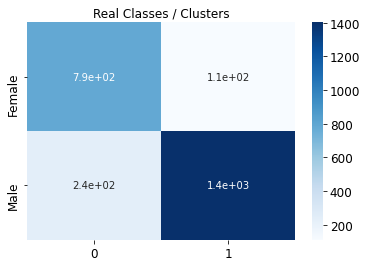

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
class_names=['Female','Male']
class_names1=[0,1]


print(classification_report(y_G1,y_predkm2,target_names=class_names)) #, target_names=class_names
cf_matrix=confusion_matrix(y_G1,y_predkm2)
import seaborn as sns
x_axis_labels = class_names1
y_axis_labels = class_names 
sns.heatmap(cf_matrix, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Blues')
plt.title('Real Classes / Clusters')

# Clusters=3

In [25]:
print("main Label : " ,y_S)
model = KMeans(n_clusters= 3, random_state= 6)  #Gender clustering
y_predkm = model.fit_predict(x_in)
clusters = np.unique(y_predkm)
print("K means Label Predict " ,y_predkm)

model = DBSCAN(eps= 0.5, min_samples= 10)
y_predDB = model.fit_predict(x_in)
clusters = np.unique(y_predDB)
print("DBSD Label Predict " , -y_predDB)

model = GaussianMixture(n_components=3)         #Check?
y_predGM = model.fit_predict(x_in)
clusters = np.unique(y_predGM)
print("Guassian Label predict : " , y_predGM)

main Label :  [0 2 1 ... 0 0 0]
K means Label Predict  [2 1 1 ... 2 1 0]
DBSD Label Predict  [-60   1   0 ...   1 -23 -69]
Guassian Label predict :  [1 0 0 ... 1 0 2]


In [26]:
from sklearn import metrics
print("Contingency Matrix:\n")
print(metrics.cluster.contingency_matrix(y_S, y_predkm))
np.unique(y_S,return_counts=True)

Contingency Matrix:

[[166 271 409]
 [189 271 391]
 [168 268 412]]


(array([0, 1, 2], dtype=object), array([846, 851, 848], dtype=int64))

In [27]:
print("Adjusted Rand Index is: %.3f" %metrics.adjusted_rand_score(y_S, y_predkm))
print(metrics.adjusted_mutual_info_score(y_S, y_predkm))
print(metrics.normalized_mutual_info_score(y_S, y_predkm))
print(metrics.homogeneity_score(y_S, y_predkm))
print(metrics.completeness_score(y_S, y_predkm))
print(metrics.v_measure_score(y_S, y_predkm))

Adjusted Rand Index is: -0.000
-0.000278577127766668
0.00045645467633202903
0.0004448674141280365
0.000468661697575469
0.000456454676332029


# Clusters=6

In [28]:
print("main Label : " ,y_GS)
model = KMeans(n_clusters= 6, random_state= 6)  #Gender clustering
y_predkm = model.fit_predict(x_in)
clusters = np.unique(y_predkm)
print("K means Label Predict " ,y_predkm)

model = DBSCAN(eps= 0.5, min_samples= 10)
y_predDB = model.fit_predict(x_in)
clusters = np.unique(y_predDB)
print("DBSD Label Predict " , -y_predDB)

model = GaussianMixture(n_components=6)         #Check?
y_predGM = model.fit_predict(x_in)
clusters = np.unique(y_predGM)
print("Guassian Label predict : " , y_predGM)
# print(np.unique(y_G + y_predf1 , return_counts=True))

main Label :  [1. 4. 2. ... 1. 0. 0.]
K means Label Predict  [5 3 0 ... 5 3 4]
DBSD Label Predict  [-60   1   0 ...   1 -23 -69]
Guassian Label predict :  [1 0 4 ... 1 4 5]


In [29]:
from sklearn import metrics
print("Contingency Matrix:\n")
print(metrics.cluster.contingency_matrix(y_GS, y_predGM))
np.unique(y_GS,return_counts=True)

Contingency Matrix:

[[145 120 109   0 128  44]
 [  1 186   0  83   0  30]
 [135 112 124   0 126  54]
 [  6 180   0  81   0  33]
 [142 124 113   0 122  45]
 [  1 181   0  84   1  35]]


(array([0., 1., 2., 3., 4., 5.]),
 array([546, 300, 551, 300, 546, 302], dtype=int64))

In [30]:
print("Adjusted Rand Index is: %.3f" %metrics.adjusted_rand_score(y_GS, y_predkm))
print(metrics.adjusted_mutual_info_score(y_GS, y_predkm))
print(metrics.normalized_mutual_info_score(y_GS, y_predkm))
print(metrics.homogeneity_score(y_GS, y_predkm))
print(metrics.completeness_score(y_GS, y_predkm))
print(metrics.v_measure_score(y_GS, y_predkm))

Adjusted Rand Index is: 0.115
0.2206382720459083
0.22286200450797045
0.22030824374664695
0.22547566478490128
0.22286200450797042


# Elbow Method

Text(0, 0.5, 'WCSS')

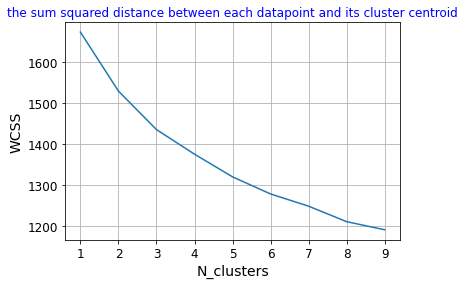

In [31]:
wcss = []
for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit(x_f1)
    wcss.append(model.inertia_)
    
plt.plot(np.linspace(1,9,9), wcss)
plt.grid()
plt.title('the sum squared distance between each datapoint and its cluster centroid',color='b')
plt.xlabel('N_clusters')
plt.ylabel('WCSS')